In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Print dataset shapes
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing labels shape: (10000, 1)


In [ ]:
# Define the CNN model
def create_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Initialize and compile model
model = create_cnn_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 582,026 (2.22 MB)

 Trainable params: 582,026 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                   epochs=10,
                   batch_size=64,
                   validation_data=(X_test, y_test))

# Save the model for later use
model.save('cnn_model.h5')

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3221 - loss: 1.8345 - val_accuracy: 0.5296 - val_loss: 1.2986
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5315 - loss: 1.3116 - val_accuracy: 0.6294 - val_loss: 1.0605
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6067 - loss: 1.1251 - val_accuracy: 0.6715 - val_loss: 0.9370
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6573 - loss: 0.9850 - val_accuracy: 0.6966 - val_loss: 0.8695
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6871 - loss: 0.8998 - val_accuracy: 0.7108 - val_loss: 0.8442
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7099 - loss: 0.8286 - val_accuracy: 0.7169 - val_loss: 0.8241
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7279 - loss: 0.7724 - val_accuracy: 0.7225 - val_loss: 0.8106
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7471 - loss: 0.7165 - val_accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7353 - loss: 0.7705
Test accuracy: 0.7363


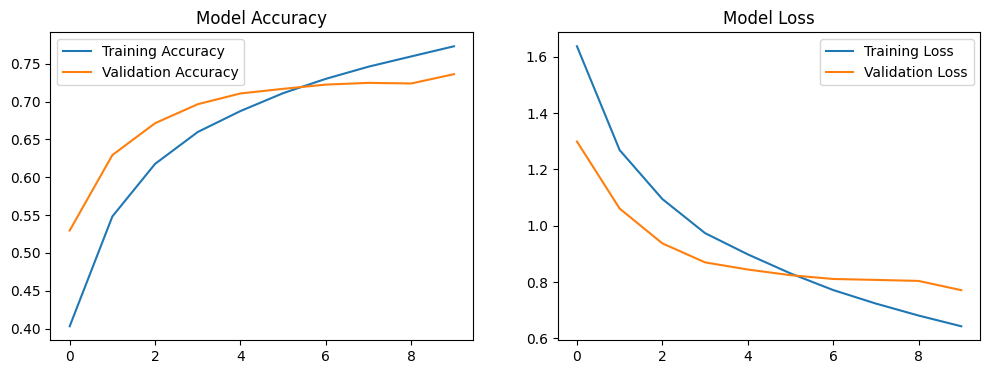

In [ ]:
# Basic evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


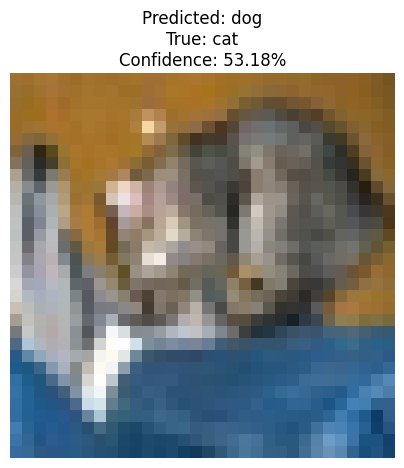


Prediction probabilities for all classes:
airplane: 0.03%
automobile: 0.02%
bird: 0.06%
cat: 46.55%
deer: 0.00%
dog: 53.18%
frog: 0.07%
horse: 0.01%
ship: 0.05%
truck: 0.02%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


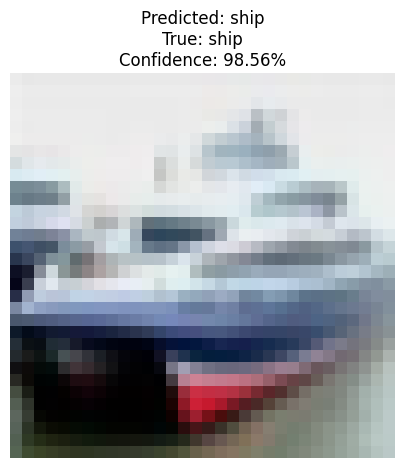


Prediction probabilities for all classes:
airplane: 0.00%
automobile: 1.44%
bird: 0.00%
cat: 0.00%
deer: 0.00%
dog: 0.00%
frog: 0.00%
horse: 0.00%
ship: 98.56%
truck: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


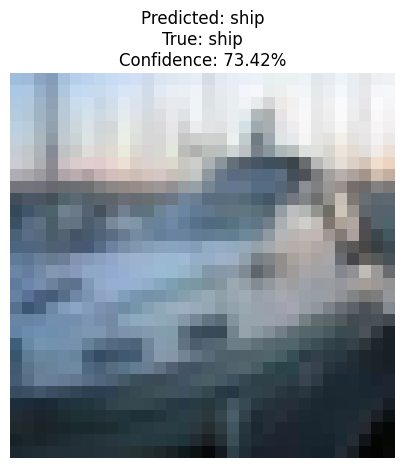


Prediction probabilities for all classes:
airplane: 23.83%
automobile: 0.90%
bird: 0.24%
cat: 0.03%
deer: 0.07%
dog: 0.01%
frog: 0.00%
horse: 0.00%
ship: 73.42%
truck: 1.51%


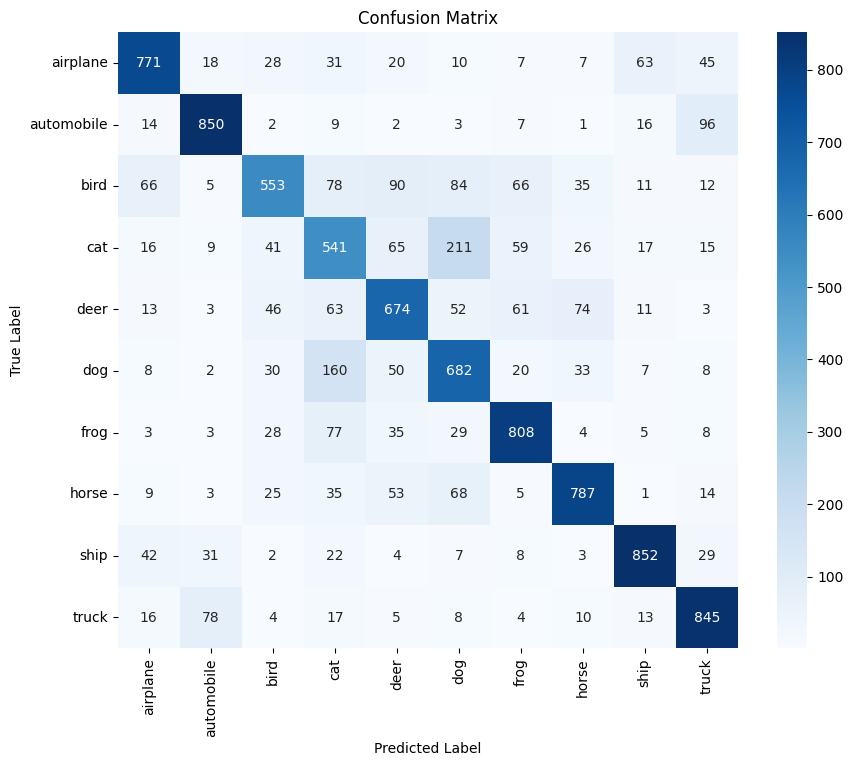

In [ ]:
# Load the trained model
loaded_model = tf.keras.models.load_model('cnn_model.h5')

# Make predictions on test data
y_pred = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Function to test and visualize a specific image
def test_single_image(index):
    # Get the image and true label
    test_image = X_test[index]
    true_label = y_test[index][0]
    pred_prob = loaded_model.predict(np.expand_dims(test_image, axis=0))
    pred_class = np.argmax(pred_prob)

    # Display the image with prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(test_image)
    plt.title(f"Predicted: {class_names[pred_class]}\n"
              f"True: {class_names[true_label]}\n"
              f"Confidence: {pred_prob[0][pred_class]:.2%}")
    plt.axis('off')
    plt.show()

    # Print detailed probabilities
    print("\nPrediction probabilities for all classes:")
    for i, prob in enumerate(pred_prob[0]):
        print(f"{class_names[i]}: {prob:.2%}")

# Test some sample images (change the index to test different images)
test_single_image(0)  # First test image
test_single_image(1)  # Second test image
test_single_image(2)  # Third test image

# Confusion matrix (optional detailed evaluation)
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()